# Laboration - skolstatistik

## Uppgift 0 - uppvärmning med riket

### a)

In [2]:
import pandas as pd

[df_math, df_english, df_swedish, df_sfi] = [
    pd.read_excel("./data/riket2023_åk9_np.xlsx", sheet_name=sheet, skiprows=8)
    for sheet in ["Matematik", "Engelska", "Svenska", "Svenska som andraspråk"]
]

for df in [df_math, df_english, df_swedish, df_sfi]:
    df.columns = [
        "Plats",
        "Huvudman",
        "Totalt (A-F)",
        "Flickor (A-F)",
        "Pojkar (A-F)",
        "Totalt (A-E)",
        "Flickor (A-E)",
        "Pojkar (A-E)",
        "Totalt (poäng)",
        "Flickor (poäng)",
        "Pojkar (poäng)",
    ]

df_sfi

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,14092,6447,7645,77.7,81.6,74.3,9.4,10.2,8.7
1,Riket,Kommunal,11963,5495,6468,75.9,80,72.4,9,9.9,8.3
2,Riket,Enskild,2122,949,1173,87.7,90.9,85.2,11.1,12,10.4
3,Riket,Skolverket,..,..,..,..,..,..,..,..,..


### b)

In [6]:
[total_f, girls_f, boys_f] = [
    int(round(df_math.at[0, f"{name} (A-F)"] * ((100 - df_math.at[0, f"{name} (A-E)"]) / 100)))
    for name in ["Totalt", "Flickor", "Pojkar"]
]

# The amount of failed grades for boys and girls don't quite add up to the total failed grades.
# This could be because of the imprecise ~100 values from "skolverket" or because some students identify as nonbinary or similar.
print(
    f"Totalt fick circa {total_f} elever underkänt i matte, av dessa så var {girls_f} flickor och {boys_f} pojkar."
)

Totalt fick circa 11637 elever underkänt i matte, av dessa så var 5825 flickor och 5798 pojkar.


### c)

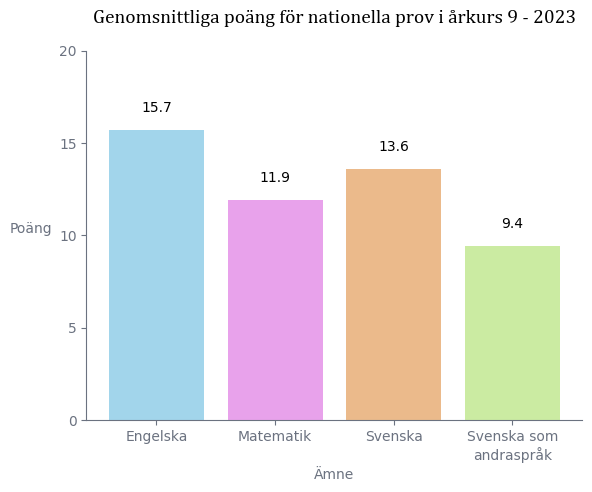

In [4]:
import matplotlib.pyplot as plt
import numpy as np


# Gotten from: https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i] + 1, y[i], ha="center")


x = np.array(["Engelska", "Matematik", "Svenska", "Svenska som\nandraspråk"])
y = np.array(
    [df.at[0, "Totalt (poäng)"] for df in [df_english, df_math, df_swedish, df_sfi]]
)

GRAY1 = "#6b7280"

color = ["#A2D5EB", "#E8A2EB", "#EBBA8B", "#CBEBA2"]

ax = plt.subplot(111)

ax.bar(x, y, color=color)
ax.set_title(
    "Genomsnittliga poäng för nationella prov i årkurs 9 - 2023",
    fontdict={"fontsize": 14},
    pad=20,
).set_fontname("cambria")
ax.set_xlabel("Ämne", color=GRAY1)
ax.set_ylabel("Poäng", rotation=0, labelpad=20, color=GRAY1)
ax.set_yticks(range(0, 21, 5))
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["bottom", "left"]].set_color(GRAY1)
ax.tick_params(colors=GRAY1)
addlabels(x, y)

### d)

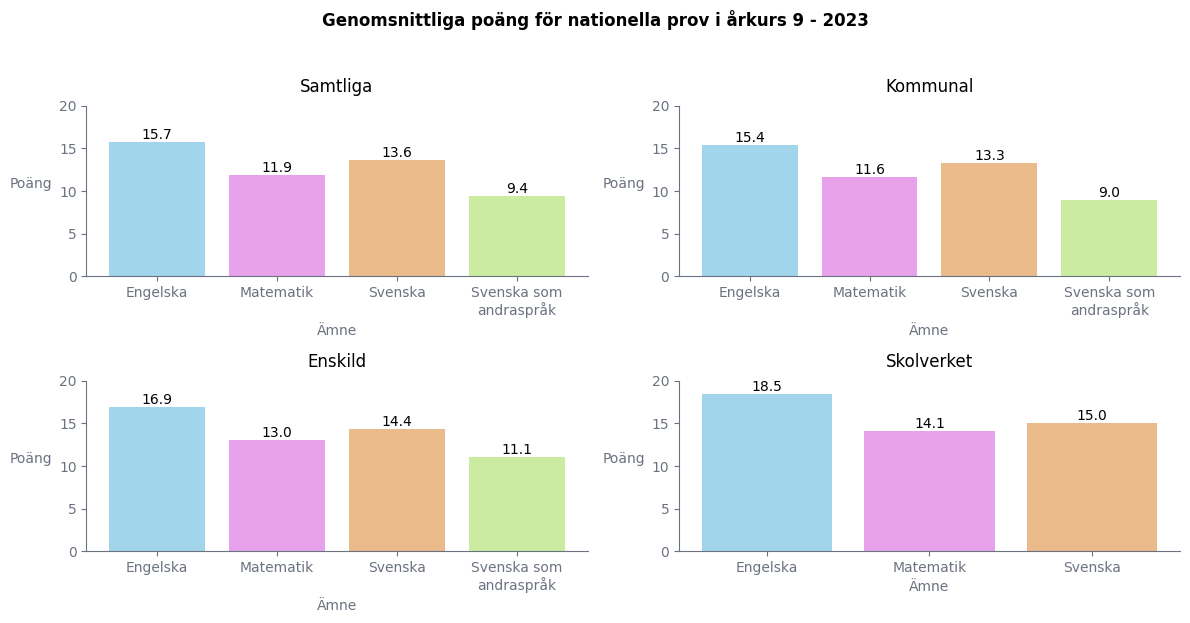

In [39]:
fig, axes = plt.subplots(2, 2, dpi=100, figsize=(12, 6))
admin_type = ["Samtliga", "Kommunal", "Enskild", "Skolverket"]
for i, ax in zip(range(4), axes.flatten()):
    if i < 3:
        x = ["Engelska", "Matematik", "Svenska", "Svenska som\nandraspråk"]
        y = [
            df.at[i, "Totalt (poäng)"]
            for df in [df_english, df_math, df_swedish, df_sfi]
        ]
    else:
        x = ["Engelska", "Matematik", "Svenska"]
        y = [df.at[i, "Totalt (poäng)"] for df in [df_english, df_math, df_swedish]]
    ax.bar(x, y, color=color)
    ax.set_title(f"{admin_type[i]}", pad=10)
    ax.set_xlabel("Ämne", color=GRAY1)
    ax.set_ylabel("Poäng", rotation=0, labelpad=20, color=GRAY1)
    ax.set_yticks(range(0, 21, 5))
    ax.spines[["top", "right"]].set_visible(False)
    ax.spines[["bottom", "left"]].set_color(GRAY1)
    ax.tick_params(colors=GRAY1)
    ax.bar_label(ax.containers[0], fmt=lambda x: x if x > 0 else "", label_type="edge")

fig.suptitle(
    "Genomsnittliga poäng för nationella prov i årkurs 9 - 2023",
    y=1.03,
    fontweight="bold",
)
fig.tight_layout()

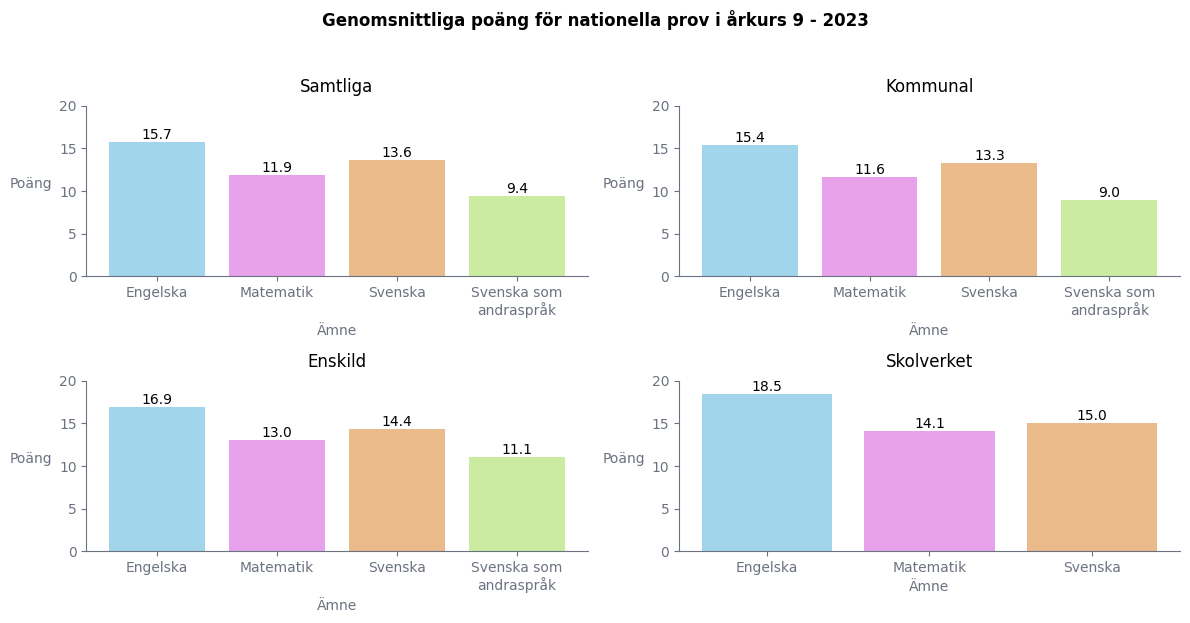

In [41]:
fig, axes = plt.subplots(2, 2, dpi=100, figsize=(12, 6))
admin_type = {0:"Samtliga", 1:"Kommunal", 2:"Enskild", 3:"Skolverket"}
for admin, ax in zip(admin_type, axes.flatten()):
    if admin_type[admin] == "Skolverket":
        x = ["Engelska", "Matematik", "Svenska"]
        y = [df.at[admin, "Totalt (poäng)"] for df in [df_english, df_math, df_swedish]]
    else:
        x = ["Engelska", "Matematik", "Svenska", "Svenska som\nandraspråk"]
        y = [
            df.at[admin, "Totalt (poäng)"]
            for df in [df_english, df_math, df_swedish, df_sfi]
        ]
    ax.bar(x, y, color=color)
    ax.set_title(f"{admin_type[admin]}", pad=10)
    ax.set_xlabel("Ämne", color=GRAY1)
    ax.set_ylabel("Poäng", rotation=0, labelpad=20, color=GRAY1)
    ax.set_yticks(range(0, 21, 5))
    ax.spines[["top", "right"]].set_visible(False)
    ax.spines[["bottom", "left"]].set_color(GRAY1)
    ax.tick_params(colors=GRAY1)
    ax.bar_label(ax.containers[0], fmt=lambda x: x if x > 0 else "", label_type="edge")

fig.suptitle(
    "Genomsnittliga poäng för nationella prov i årkurs 9 - 2023",
    y=1.03,
    fontweight="bold",
)
fig.tight_layout()

In [5]:
girls_f = int(df_math.at[0, "Flickor (A-F)"] * ((100 - df_math.at[0, "Flickor (A-E)"])/100))

girls_f

5824

In [35]:
import matplotlib.font_manager

fonts = set(f.name for f in matplotlib.font_manager.fontManager.ttflist)
for font in sorted(fonts):
    print(font)

Arial
Bahnschrift
Book Antiqua
Bookman Old Style
Bookshelf Symbol 7
Calibri
Cambria
Candara
Century
Century Gothic
Comic Sans MS
Consolas
Constantia
Corbel
Courier New
DejaVu Sans
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif Display
Dubai
Ebrima
Franklin Gothic Medium
Gabriola
Gadugi
Garamond
Georgia
HoloLens MDL2 Assets
Impact
Ink Free
Javanese Text
Leelawadee UI
Lucida Console
Lucida Sans Unicode
MS Gothic
MS Reference Sans Serif
MS Reference Specialty
MT Extra
MV Boli
Malgun Gothic
Microsoft Himalaya
Microsoft JhengHei
Microsoft New Tai Lue
Microsoft PhagsPa
Microsoft Sans Serif
Microsoft Tai Le
Microsoft YaHei
Microsoft Yi Baiti
MingLiU-ExtB
Mongolian Baiti
Monotype Corsiva
Myanmar Text
Nirmala UI
Palatino Linotype
STIXGeneral
STIXNonUnicode
STIXSizeFiveSym
STIXSizeFourSym
STIXSizeOneSym
STIXSizeThreeSym
STIXSizeTwoSym
Segoe MDL2 Assets
Segoe Print
Segoe Script
Segoe UI
Segoe UI Emoji
Segoe UI Historic
Segoe UI Symbol
SimSun
SimSun-ExtB
Sitka Small
Sylfaen
Symbol
